In [1]:
import wikipedia as wiki
import requests
from collections import Counter
import matplotlib.pyplot as plt
import re
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')

In [2]:
result = wiki.search("Sebastian Thrun")
result

['Sebastian Thrun',
 'Udacity',
 'Waymo',
 'Lo and Behold, Reveries of the Connected World',
 'X (company)',
 'Transfer learning',
 'Simultaneous localization and mapping',
 'Dieter Fox',
 'Monte Carlo localization',
 'Stanley (vehicle)']

In [3]:
page = wiki.page(result[0], preload= True)

In [4]:
#Text Pre-processing

text = page.content
text = re.sub("(={2}.+={2})", "", text)
text = re.sub(r"[\n]+","\n", text)
text = re.sub(r"\n",".\n", text)
text = text.replace("..",".")
print(text)

Sebastian Thrun (born May 14, 1967) is an entrepreneur, educator, and computer scientist from Germany. He is CEO of Kitty Hawk Corporation, and chairman and co-founder of Udacity. Before that, he was a Google VP and Fellow, a Professor of Computer Science at Stanford University, and before that at Carnegie Mellon University. At Google, he founded Google X and Google's self-driving car team. He is also an Adjunct Professor at Stanford University and at Georgia Tech.Thrun led development of the robotic vehicle Stanley which won the 2005 DARPA Grand Challenge, and which has since been placed on exhibit in the Smithsonian Institution's National Museum of American History. His team also developed a vehicle called Junior, which placed second at the DARPA Grand Challenge in 2007. Thrun led the development of the Google self-driving car.Thrun is also known for his work on probabilistic algorithms for robotics with applications including robotic mapping. In recognition of his contributions, and

In [5]:
doc = nlp(text)
print([(word, word.ent_type_) for word in doc if word.ent_type_])

[(Sebastian, 'PERSON'), (Thrun, 'PERSON'), (May, 'DATE'), (14, 'DATE'), (,, 'DATE'), (1967, 'DATE'), (Germany, 'GPE'), (Kitty, 'ORG'), (Hawk, 'ORG'), (Corporation, 'ORG'), (Udacity, 'ORG'), (Google, 'ORG'), (VP, 'ORG'), (Computer, 'ORG'), (Science, 'ORG'), (Stanford, 'ORG'), (University, 'ORG'), (Carnegie, 'ORG'), (Mellon, 'ORG'), (University, 'ORG'), (Google, 'ORG'), (Google, 'ORG'), (X, 'ORG'), (Google, 'ORG'), (Stanford, 'ORG'), (University, 'ORG'), (Georgia, 'ORG'), (Tech, 'ORG'), (Thrun, 'GPE'), (Stanley, 'ORG'), (2005, 'DATE'), (DARPA, 'EVENT'), (Grand, 'EVENT'), (Challenge, 'EVENT'), (the, 'ORG'), (Smithsonian, 'ORG'), (Institution, 'ORG'), ('s, 'ORG'), (National, 'ORG'), (Museum, 'ORG'), (of, 'ORG'), (American, 'ORG'), (History, 'ORG'), (Junior, 'ORG'), (second, 'ORDINAL'), (the, 'FAC'), (DARPA, 'FAC'), (Grand, 'FAC'), (Challenge, 'FAC'), (2007, 'DATE'), (Google, 'ORG'), (Thrun, 'GPE'), (the, 'DATE'), (age, 'DATE'), (of, 'DATE'), (39, 'DATE'), (the, 'ORG'), (National, 'ORG'), (

In [6]:
displacy.render(doc, style = 'ent', jupyter = True)

In [7]:
#############-----------CUSTOM TRAIN SPACY---------###############
# ner = nlp.get_pipe("ner")
# Train_Data = [("Sam led the development of electric vehicle Marco", {"entities": [(0, 3, "PERSON"), (44, 49, "PERSON")]}),
#               ("Sam is also known for his work on Mathematics", {"entities": [(0, 3, "PERSON")]}),
#               ("Sam was born in 1983", {"entities": [(0, 3, "PERSON"), (16, 20, "DATE")]}),
#               ("Sam spent an year in Belgium", {"entities": [(0, 3, "PERSON"), (21, 28, "GPE")]})]


# for _, annotations in Train_Data:
#     for ent in annotations.get('entities'):
#         ner.add_label(ent[2])
        
# disable_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

# import random
# from spacy.util import minibatch, compounding
# from pathlib import Path

# with nlp.disable_pipes(*disable_pipes):
#     optimizer = nlp.resume_training()
    
#     for itn in range(100):
        
#         random.shuffle(Train_Data)
#         losses = {}
        
        
#         batches = minibatch(Train_Data, size = compounding(1.0, 4.0, 1.001))
#         for batch in batches:
#             text, annotations = zip(*batch)
#             nlp.update(text, annotations, drop = 0.5, sgd = optimizer, losses = losses)
#         print(losses)

In [8]:
persons  = [ent.text for ent in doc.ents if ent.label_=='PERSON' ]
person_count = Counter(persons)
print("PERSON:", person_count)

date  = [ent.text for ent in doc.ents if ent.label_=='DATE' ]
date_count = Counter(date)
print("\nDATE:", date_count)

organization  = [ent.text for ent in doc.ents if ent.label_=='ORG' ]
organization_count = Counter(organization)
print("\nORGANIZATION:", organization_count)

geographical_location  = [ent.text for ent in doc.ents if ent.label_=='GPE' ]
geographical_location_count = Counter(geographical_location)
print("\nGEOGRAPHICAL_LOCATIONS:", geographical_location_count)

PERSON: Counter({'Thrun': 4, 'Sebastian Thrun': 3, 'Wolfram Burgard': 2, 'Dieter Fox': 2, 'William L. Whittaker': 2, 'Kristin': 1, 'Vordiplom': 1, 'Armin B. Cremers': 1, 'Minerva': 1, 'Pitt Nursebot': 1, 'Scott Thayer': 1, 'Michael Montemerlo': 1})

DATE: Counter({'2007': 5, '2005': 3, '1995': 2, '1998': 2, '2001': 2, '1997': 2, '2011': 2, 'May 14, 1967': 1, 'the age of 39': 1, '1967': 1, '1988': 1, '1993': 1, 'a sabbatical year': 1, 'July 2003': 1, 'January 2004': 1, 'April 1, 2011': 1, 'January 23, 2012': 1, '2018': 1, '1994': 1, 'two-week': 1, '2002': 1, '2003': 1, 'the fall of 2005': 1, '20114': 1, '2012': 1})

ORGANIZATION: Counter({'Google': 9, 'CMU': 6, 'Stanford University': 5, 'Stanford': 4, 'Carnegie Mellon University': 3, 'Thrun': 3, 'Udacity': 2, 'Google VP': 2, 'Stanley': 2, 'National Museum of American History': 2, 'Smithsonian': 2, 'Probabilistic Robotics': 2, 'Kitty Hawk Corporation': 1, 'Computer Science': 1, 'Google X': 1, 'Georgia Tech': 1, "the Smithsonian Instituti

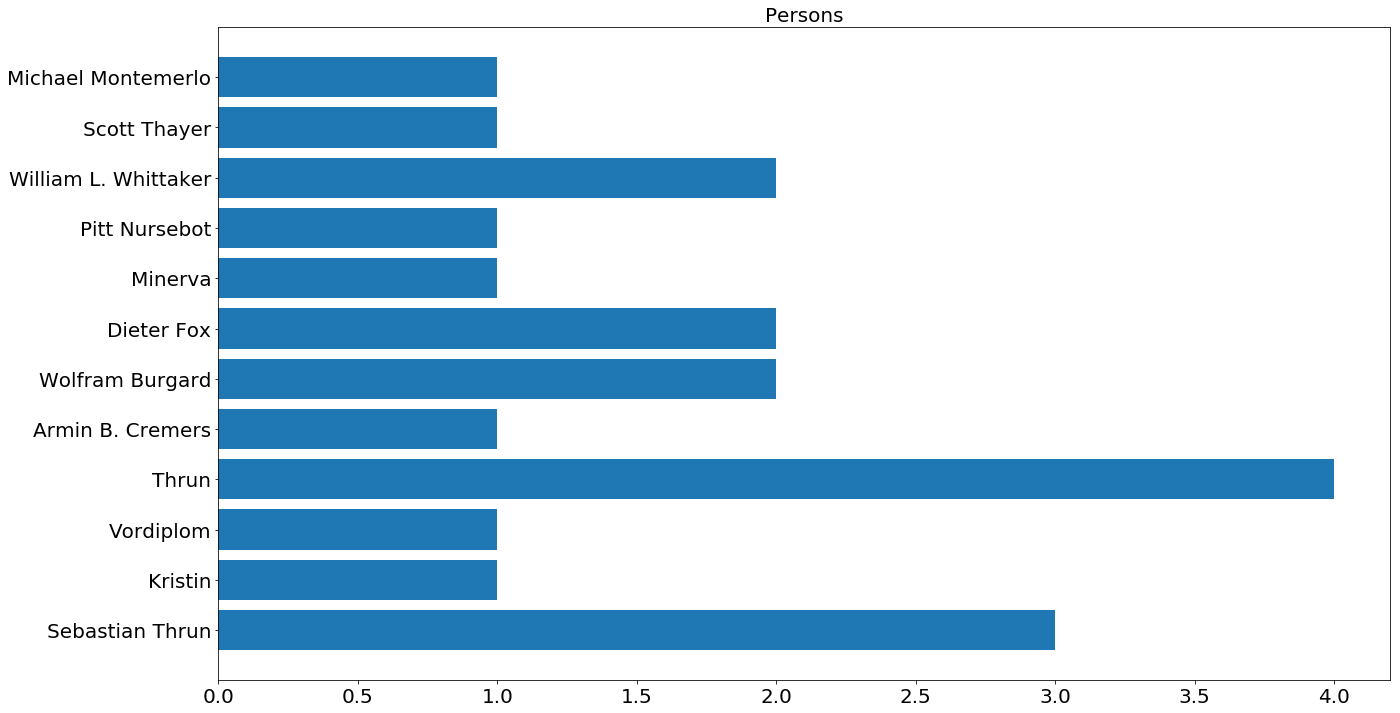

In [10]:
fig = plt.gcf()
ax= plt.gca()
fig.set_size_inches(21, 12)
plt.barh(list(person_count.keys()), list(person_count.values()))
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.title("Persons", fontsize=20)
plt.show()

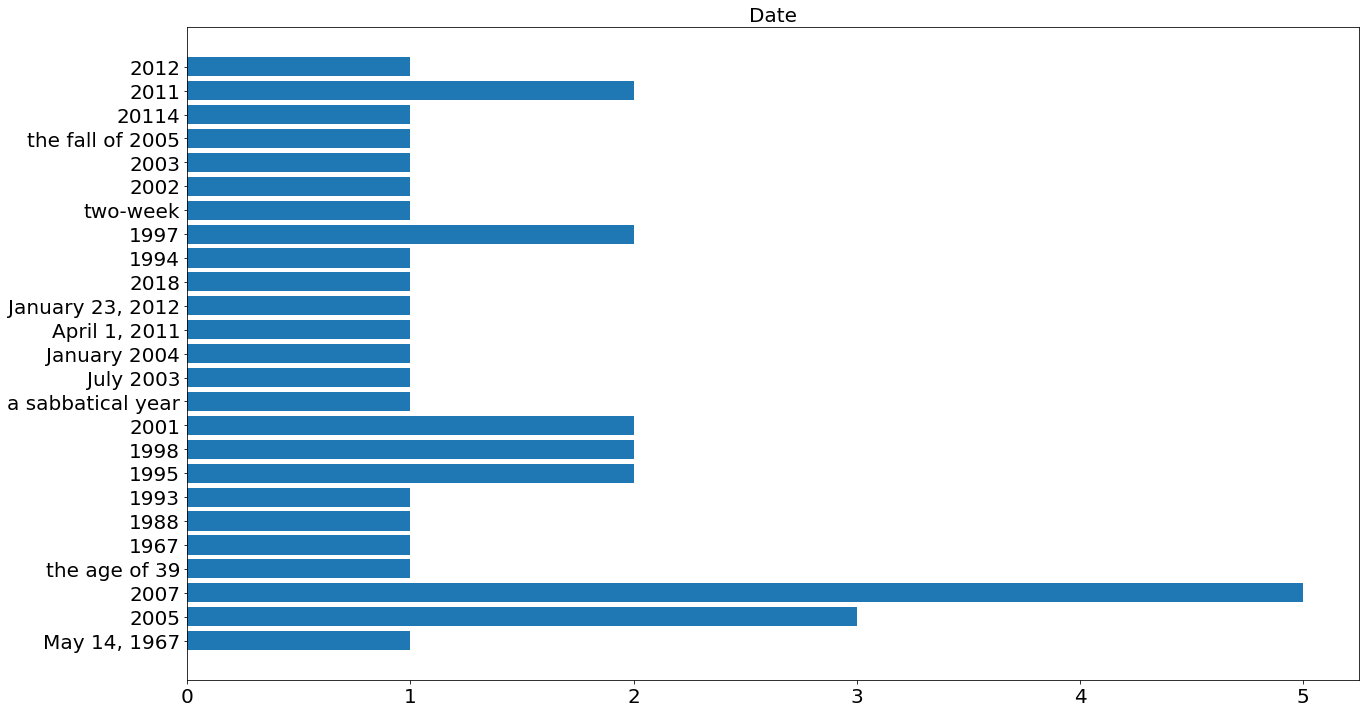

In [11]:
fig = plt.gcf()
ax= plt.gca()
fig.set_size_inches(21, 12)
plt.barh(list(date_count.keys()), list(date_count.values()))
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.title("Date", fontsize=20)
plt.show()

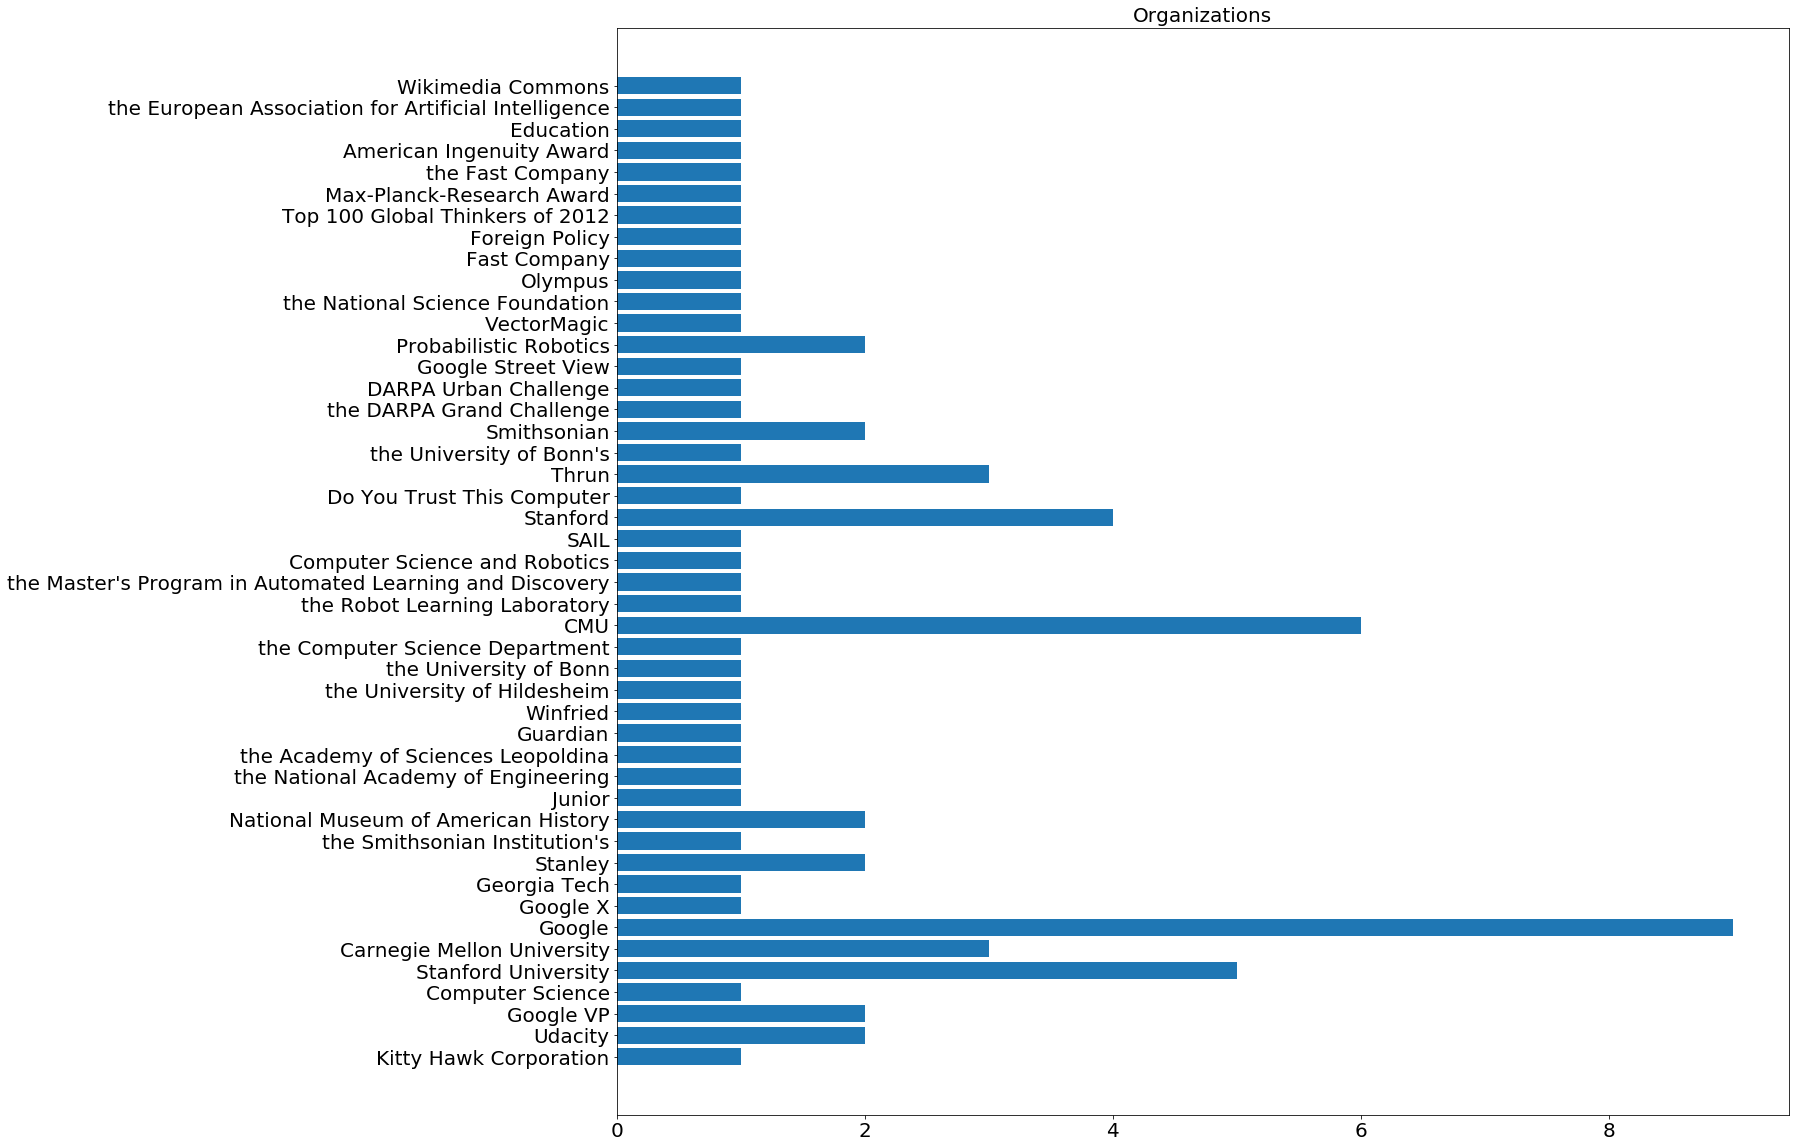

In [15]:
fig = plt.gcf()
ax= plt.gca()
fig.set_size_inches(21, 20)
plt.barh(list(organization_count.keys()), list(organization_count.values()))
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.title("Organizations", fontsize=20)
plt.show()

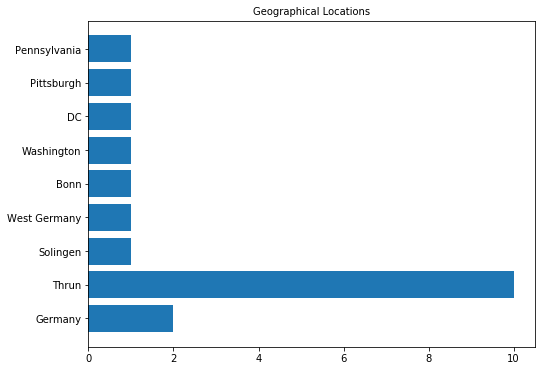

In [20]:
fig = plt.gcf()
ax= plt.gca()
fig.set_size_inches(8, 6)
plt.barh(list(geographical_location_count.keys()), list(geographical_location_count.values()))
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Geographical Locations", fontsize=10)
plt.show()